<a href="https://colab.research.google.com/github/Ishita95-harvad/Shifting-Seas-Ocean-Climate-Marine-Life/blob/main/Shifting_Seas_Ocean_Climate_%26_Marine_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shifting Seas: Ocean Climate & Marine Life


A Multi-Year Global Dataset of Sea Surface Temperature, pH Levels, and Corals.

## Data loading

### Subtask:
Load the "realistic_ocean_climate_dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('realistic_ocean_climate_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'realistic_ocean_climate_dataset.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


(500, 9)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including data types, missing values, and summary statistics of each column. Identify potential outliers.


**Reasoning**:
I need to explore the dataset by examining data types, missing values, summary statistics, and potential outliers, then visualize the distribution of key numerical features.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB
None

Missing values per column:
 Date                    0
Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64

Des

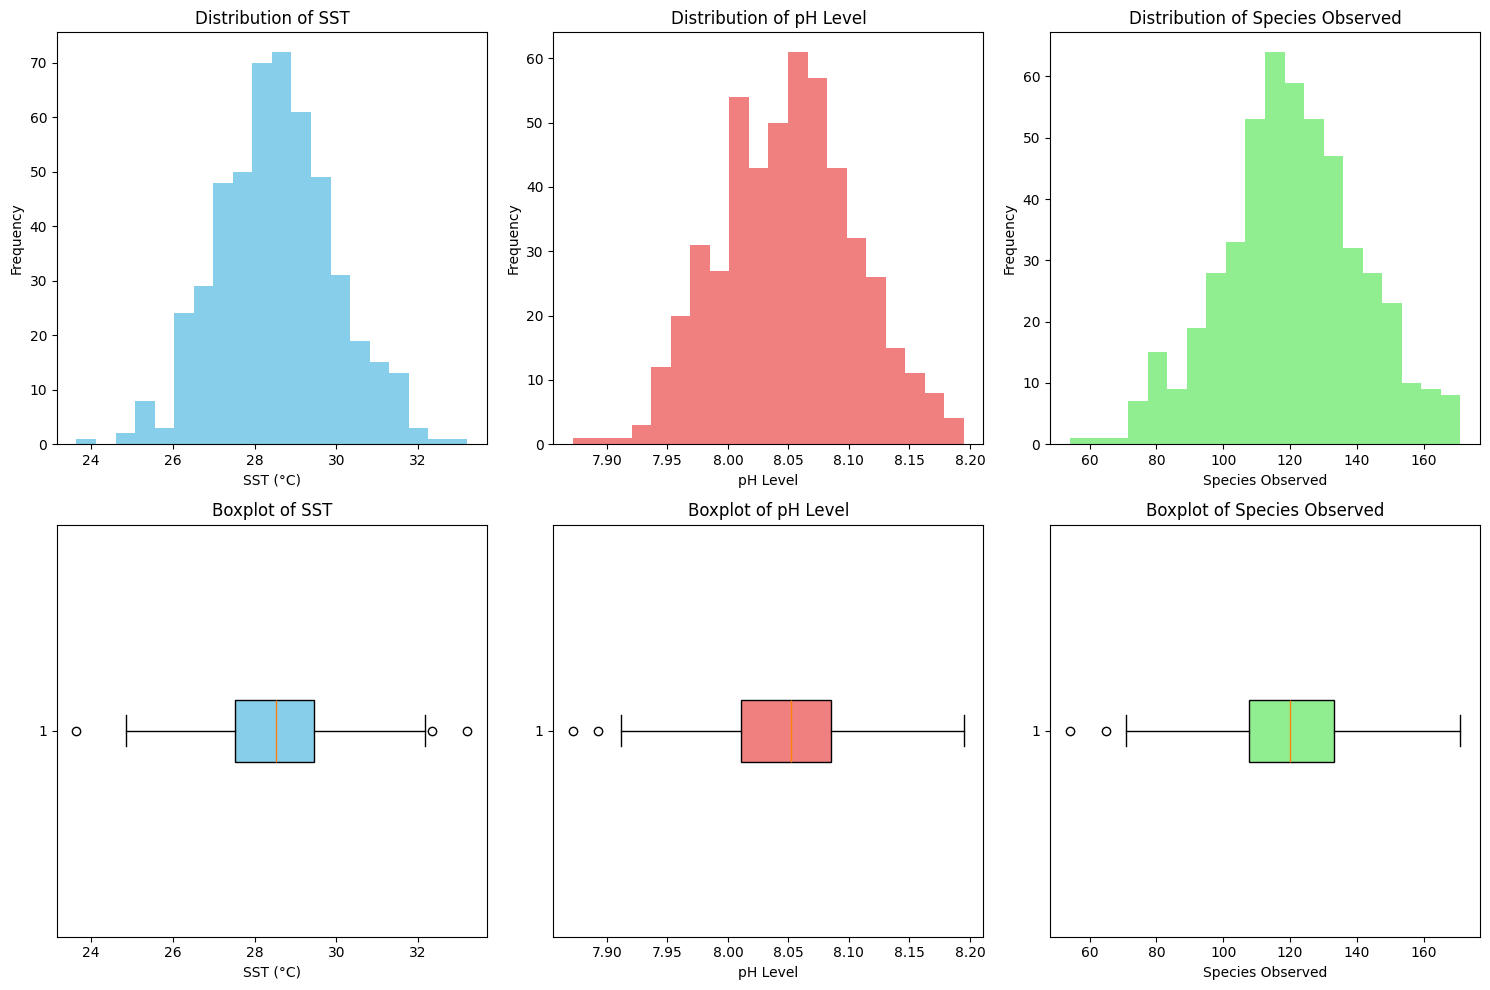

In [2]:
# Examine data types
print(df.info())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Value counts for categorical columns
print("\nValue counts for 'Location':\n", df['Location'].value_counts())
print("\nValue counts for 'Bleaching Severity':\n", df['Bleaching Severity'].value_counts())
print("\nValue counts for 'Marine Heatwave':\n", df['Marine Heatwave'].value_counts())

# Visualize distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['SST (°C)'], bins=20, color='skyblue')
plt.xlabel('SST (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of SST')

plt.subplot(2, 3, 2)
plt.hist(df['pH Level'], bins=20, color='lightcoral')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.title('Distribution of pH Level')

plt.subplot(2, 3, 3)
plt.hist(df['Species Observed'], bins=20, color='lightgreen')
plt.xlabel('Species Observed')
plt.ylabel('Frequency')
plt.title('Distribution of Species Observed')

plt.subplot(2, 3, 4)
plt.boxplot(df['SST (°C)'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('SST (°C)')
plt.title('Boxplot of SST')

plt.subplot(2, 3, 5)
plt.boxplot(df['pH Level'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('pH Level')
plt.title('Boxplot of pH Level')

plt.subplot(2, 3, 6)
plt.boxplot(df['Species Observed'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Species Observed')
plt.title('Boxplot of Species Observed')

plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values in the 'Bleaching Severity' column and addressing outliers in the 'SST (°C)' column.


**Reasoning**:
Impute missing 'Bleaching Severity' values with the mode and handle outliers in 'SST (°C)' using the IQR method. Then, verify data quality by checking for missing values and visualizing the distributions of 'SST (°C)' and 'Bleaching Severity'.



<ipython-input-3-7e37d2a4999d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bleaching Severity'].fillna(df['Bleaching Severity'].mode()[0], inplace=True)



Missing values per column:
 Date                  0
Location              0
Latitude              0
Longitude             0
SST (°C)              0
pH Level              0
Bleaching Severity    0
Species Observed      0
Marine Heatwave       0
dtype: int64


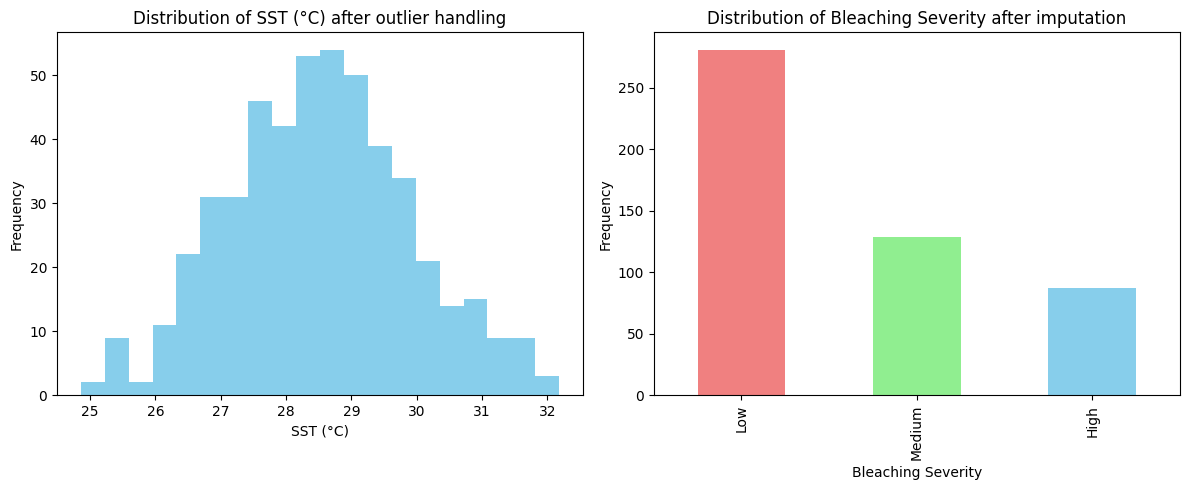

In [3]:
# Impute missing 'Bleaching Severity' with the mode
df['Bleaching Severity'].fillna(df['Bleaching Severity'].mode()[0], inplace=True)

# Calculate IQR for 'SST (°C)'
Q1 = df['SST (°C)'].quantile(0.25)
Q3 = df['SST (°C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR
df = df[(df['SST (°C)'] >= lower_bound) & (df['SST (°C)'] <= upper_bound)]

# Verify data quality
print("\nMissing values per column:\n", df.isnull().sum())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['SST (°C)'], bins=20, color='skyblue')
plt.xlabel('SST (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of SST (°C) after outlier handling')

plt.subplot(1, 2, 2)
df['Bleaching Severity'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue'])
plt.xlabel('Bleaching Severity')
plt.ylabel('Frequency')
plt.title('Distribution of Bleaching Severity after imputation')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix this and re-run the code.  The subtask is then completed.




Missing values per column:
 Date                  0
Location              0
Latitude              0
Longitude             0
SST (°C)              0
pH Level              0
Bleaching Severity    0
Species Observed      0
Marine Heatwave       0
dtype: int64


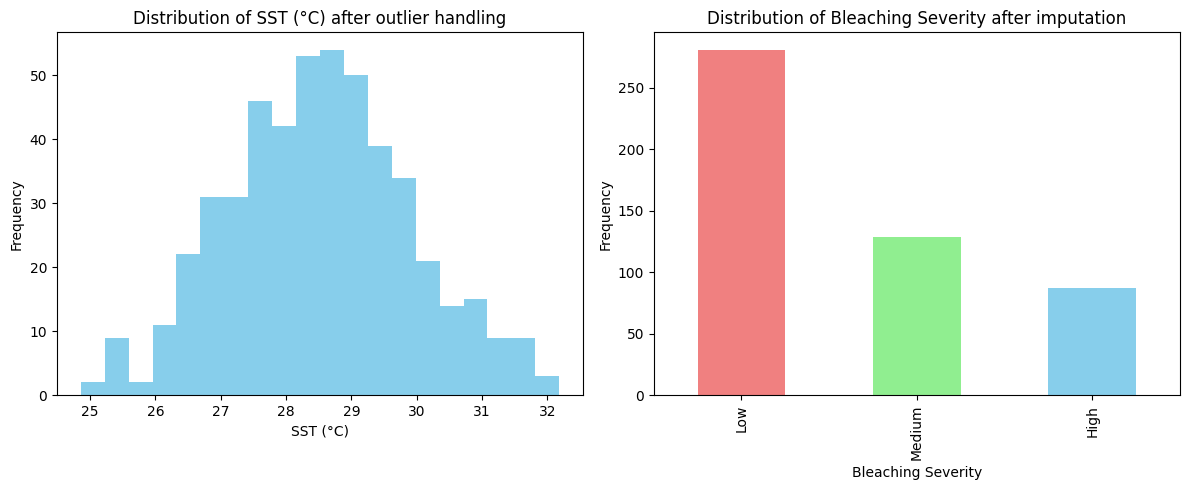

In [4]:
# Impute missing 'Bleaching Severity' with the mode
df['Bleaching Severity'] = df['Bleaching Severity'].fillna(df['Bleaching Severity'].mode()[0])

# Calculate IQR for 'SST (°C)'
Q1 = df['SST (°C)'].quantile(0.25)
Q3 = df['SST (°C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR
df = df[(df['SST (°C)'] >= lower_bound) & (df['SST (°C)'] <= upper_bound)]

# Verify data quality
print("\nMissing values per column:\n", df.isnull().sum())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['SST (°C)'], bins=20, color='skyblue')
plt.xlabel('SST (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of SST (°C) after outlier handling')

plt.subplot(1, 2, 2)
df['Bleaching Severity'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue'])
plt.xlabel('Bleaching Severity')
plt.ylabel('Frequency')
plt.title('Distribution of Bleaching Severity after imputation')

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Prepare the data for analysis and modeling.


**Reasoning**:
Convert the 'Date' column to datetime objects, one-hot encode categorical features, scale numerical features, and drop unnecessary columns.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Convert 'Date' column to datetime objects
try:
    df_encoded = df.copy()
    df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], errors='coerce')
except Exception as e:
    print(f"An error occurred during datetime conversion: {e}")
    # Handle the error gracefully, e.g., by using finish_task with status 'failure'

# One-hot encode categorical features
categorical_cols = ['Location', 'Bleaching Severity', 'Marine Heatwave']
try:
    enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = enc.fit_transform(df_encoded[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(categorical_cols))
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
except Exception as e:
    print(f"An error occurred during one-hot encoding: {e}")

# Scale numerical features
numerical_cols = ['SST (°C)', 'pH Level', 'Species Observed']
scaler = StandardScaler()
try:
    df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
except Exception as e:
    print(f"An error occurred during scaling: {e}")

# Drop unnecessary columns
cols_to_drop = ['Location', 'Bleaching Severity', 'Marine Heatwave', 'Latitude', 'Longitude']
try:
    df_encoded = df_encoded.drop(columns=cols_to_drop)
except KeyError as e:
    print(f"Error dropping columns: {e}")
except Exception as e:
    print(f"An unexpected error occurred while dropping columns: {e}")


display(df_encoded.head())

,Date,SST (°C),pH Level,Species Observed,Location_Caribbean Sea,Location_Galápagos,Location_Great Barrier Reef,Location_Hawaiian Islands,Location_Maldives,Location_Red Sea,Location_South China Sea,Bleaching Severity_High,Bleaching Severity_Low,Bleaching Severity_Medium,Marine Heatwave_False,Marine Heatwave_True
0,2015-01-01,0.678797,1.024167,-0.715201,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2015-01-07,0.808780,-0.827370,-0.222608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2015-01-14,0.238301,-1.852007,-1.503348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2015-01-20,0.317735,-0.989155,-1.306311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2015-01-27,0.050549,-1.312724,-0.518164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Data analysis

### Subtask:
Analyze the preprocessed data to identify patterns, trends, and correlations. Focus on relationships between oceanographic variables and climate indicators.


**Reasoning**:
Analyze the correlations between numerical features and visualize them as a heatmap. Then investigate the relationship between oceanographic variables and climate indicators using scatter plots and boxplots.



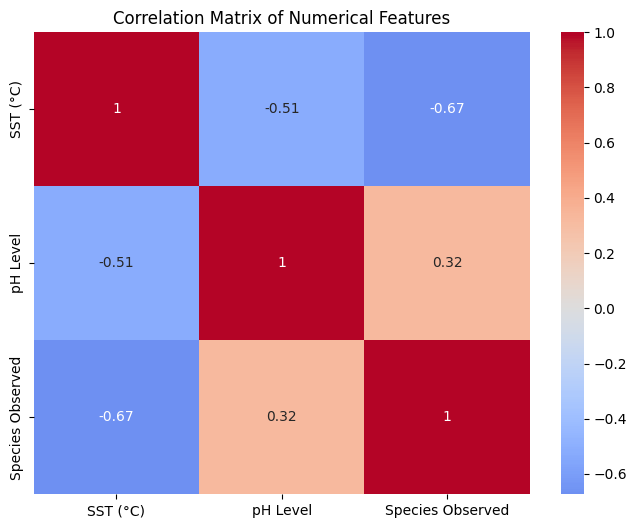

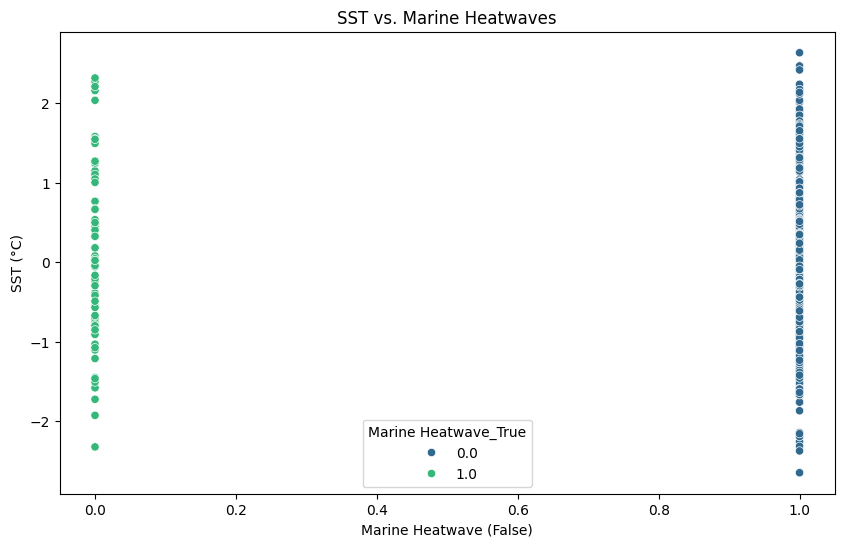

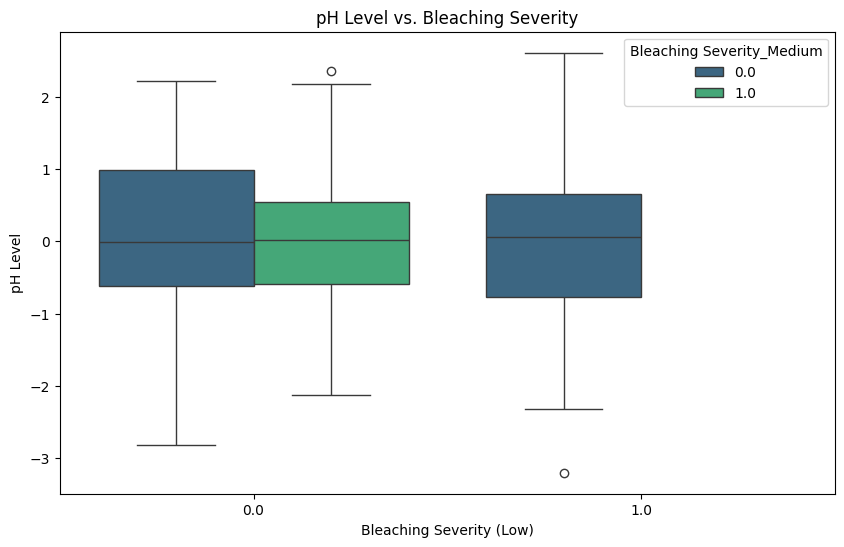

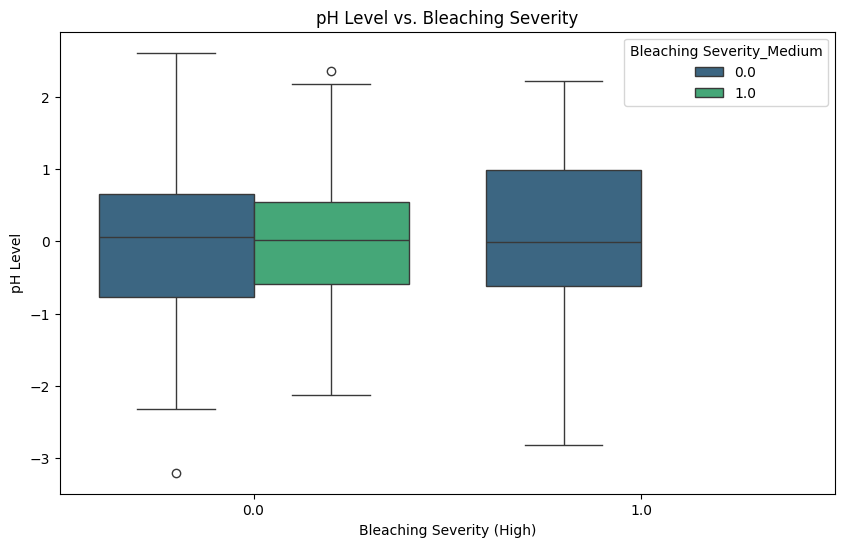

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_encoded[['SST (°C)', 'pH Level', 'Species Observed']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Investigate the relationship between SST and Marine Heatwaves
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marine Heatwave_False', y='SST (°C)', data=df_encoded, hue='Marine Heatwave_True', palette='viridis')
plt.title('SST vs. Marine Heatwaves')
plt.xlabel('Marine Heatwave (False)')
plt.ylabel('SST (°C)')
plt.show()


# Investigate the relationship between pH Level and Bleaching Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bleaching Severity_Low', y='pH Level', data=df_encoded, hue='Bleaching Severity_Medium', palette='viridis')
plt.title('pH Level vs. Bleaching Severity')
plt.xlabel('Bleaching Severity (Low)')
plt.ylabel('pH Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Bleaching Severity_High', y='pH Level', data=df_encoded, hue='Bleaching Severity_Medium', palette='viridis')
plt.title('pH Level vs. Bleaching Severity')
plt.xlabel('Bleaching Severity (High)')
plt.ylabel('pH Level')
plt.show()

**Reasoning**:
Analyze the temporal trends in 'SST (°C)' and 'pH Level' over time using line plots, aggregating the data to yearly averages to show broader patterns.



<ipython-input-7-afefc386522b>:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df_encoded.resample('Y', on='Date').mean()


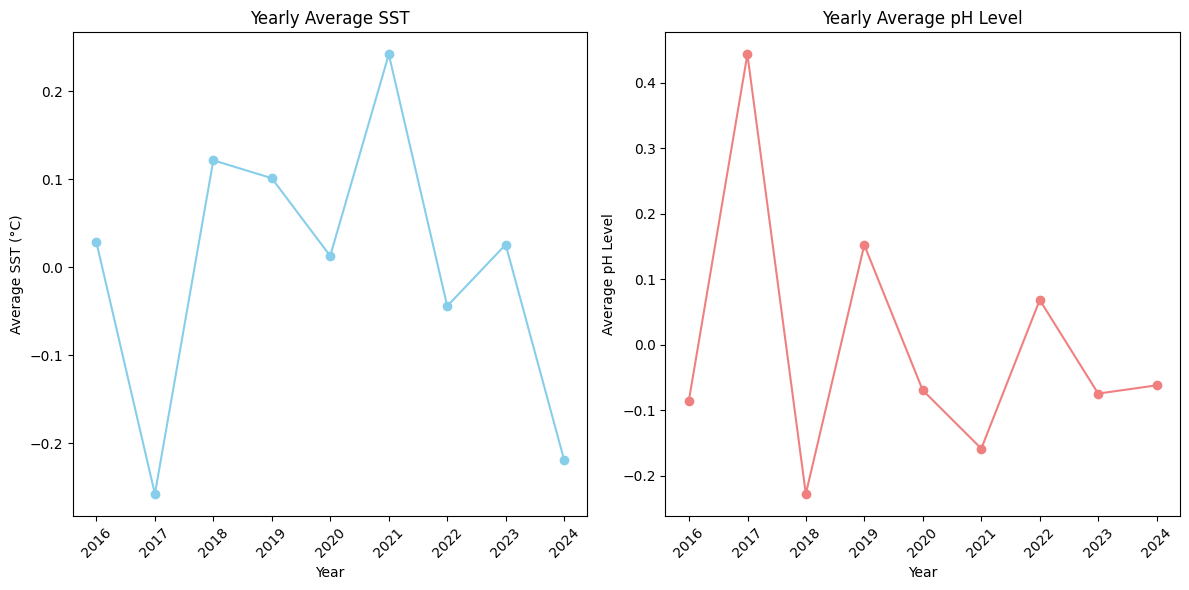

In [7]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(df_encoded['Date']):
    df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], errors='coerce')

# Aggregate data to yearly averages
df_yearly = df_encoded.resample('Y', on='Date').mean()

# Create line plots for SST and pH over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df_yearly.index, df_yearly['SST (°C)'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average SST (°C)')
plt.title('Yearly Average SST')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(df_yearly.index, df_yearly['pH Level'], marker='o', linestyle='-', color='lightcoral')
plt.xlabel('Year')
plt.ylabel('Average pH Level')
plt.title('Yearly Average pH Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Reasoning**:
Explore potential interactions between features, for example, how the relationship between 'SST (°C)' and 'Bleaching Severity' varies depending on 'Location'.  Use grouped boxplots to examine these interactions.



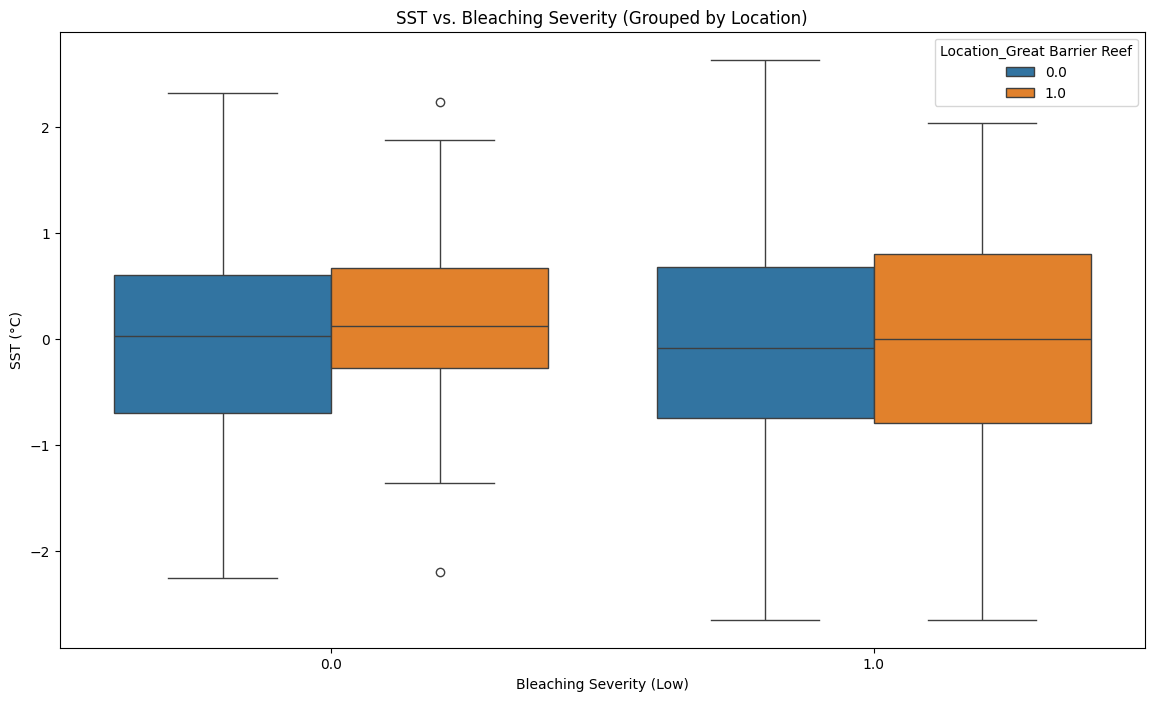

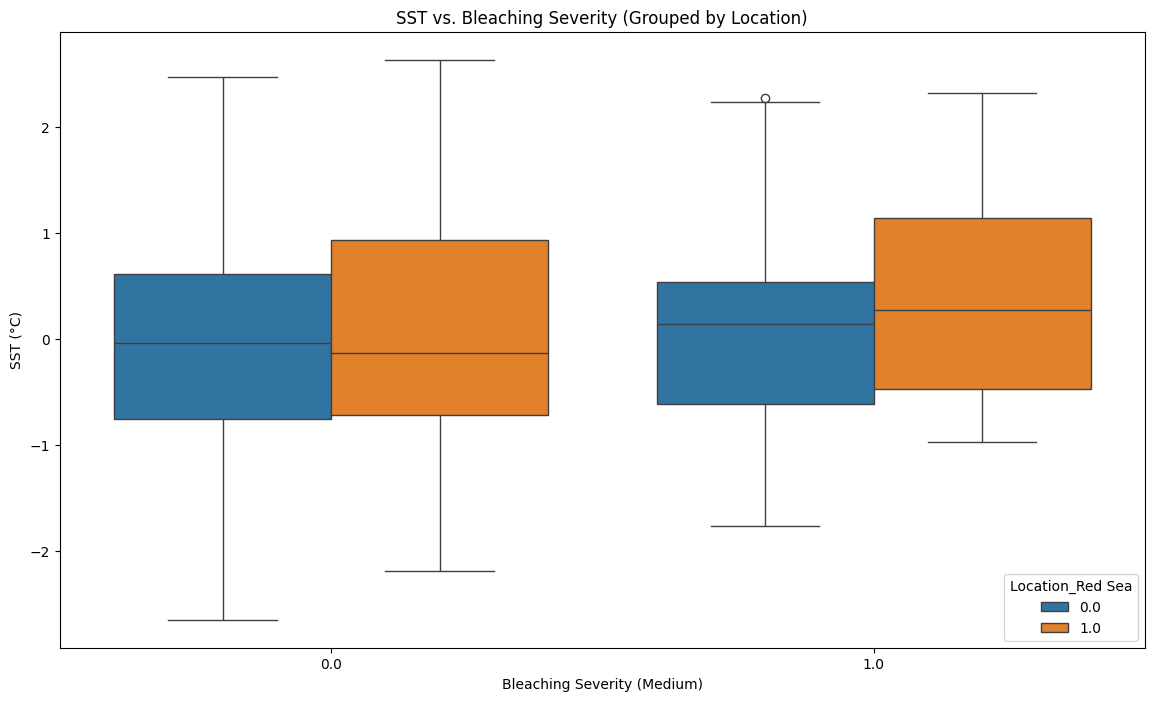

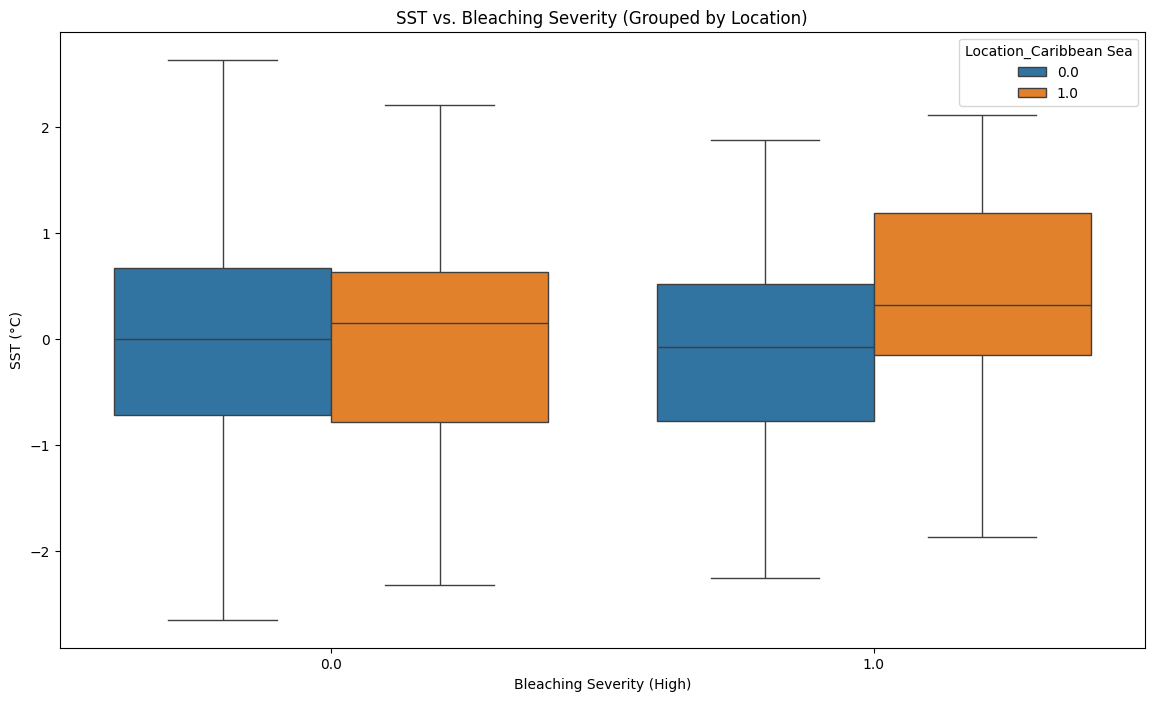

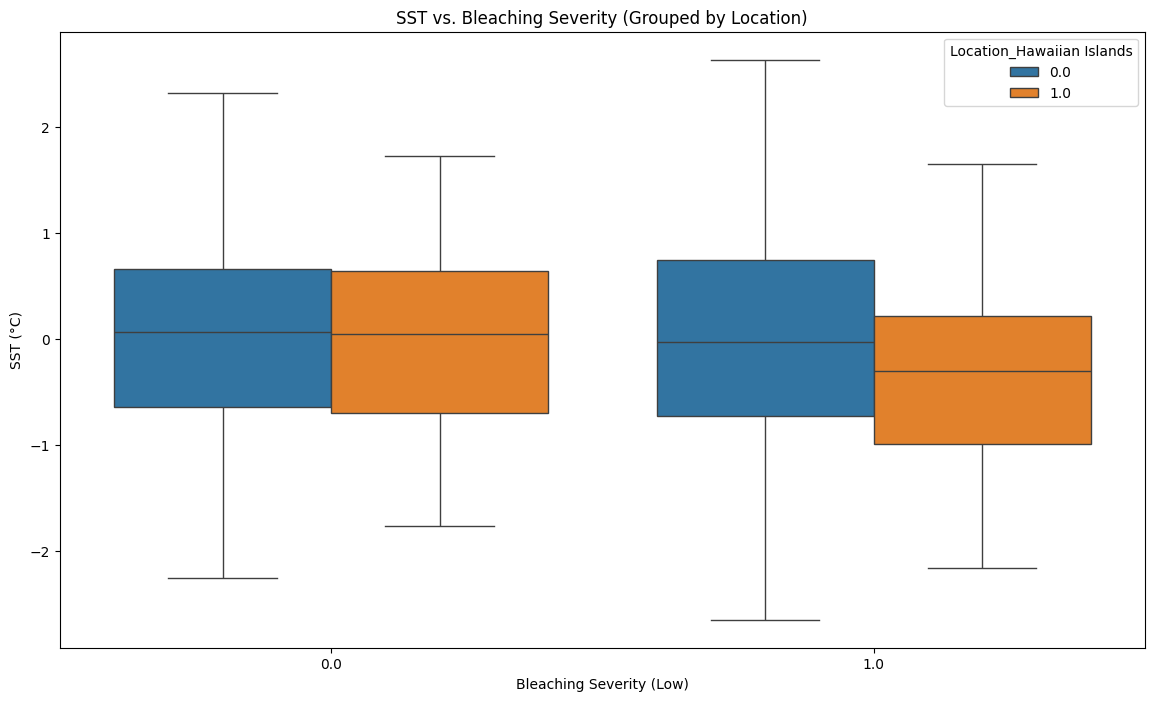

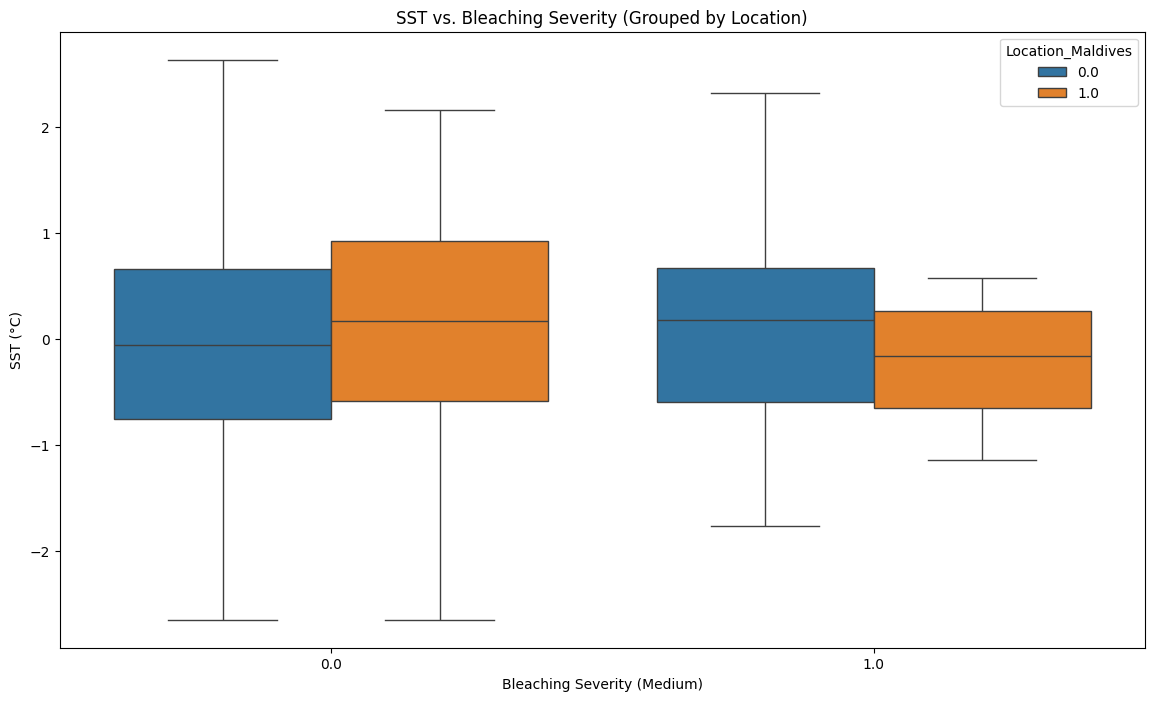

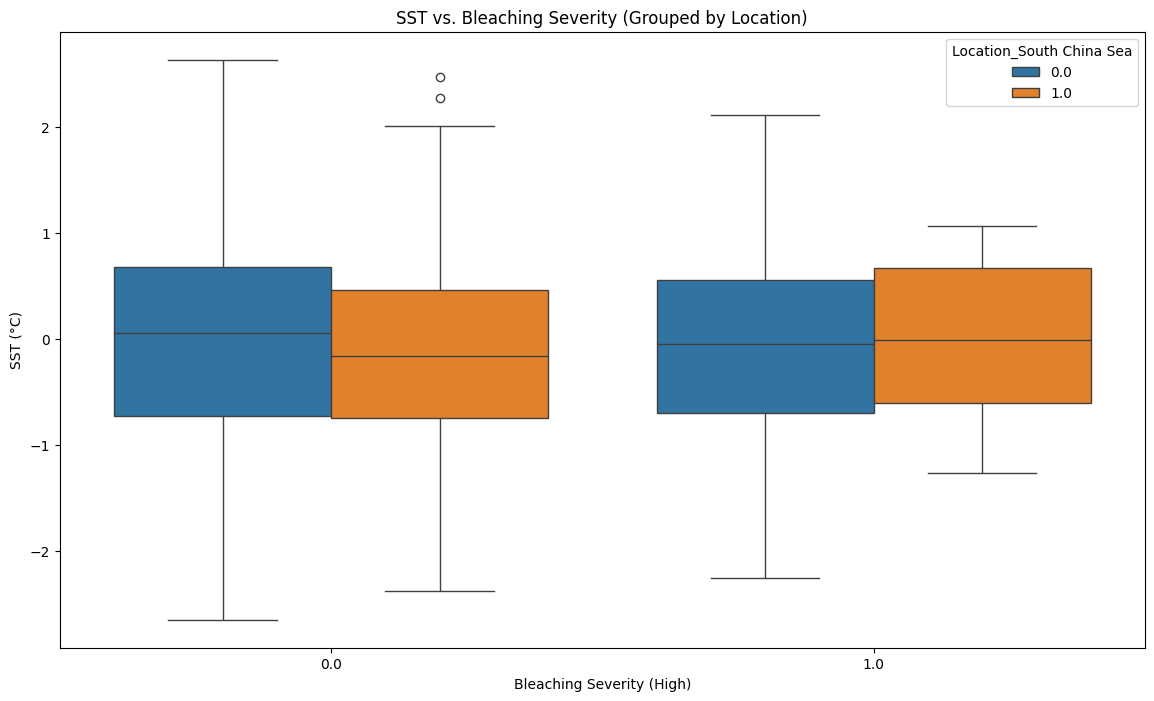

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped boxplot: SST vs. Bleaching Severity, grouped by Location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_Low', y='SST (°C)', hue='Location_Great Barrier Reef', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (Low)')
plt.ylabel('SST (°C)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_Medium', y='SST (°C)', hue='Location_Red Sea', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (Medium)')
plt.ylabel('SST (°C)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_High', y='SST (°C)', hue='Location_Caribbean Sea', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (High)')
plt.ylabel('SST (°C)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_Low', y='SST (°C)', hue='Location_Hawaiian Islands', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (Low)')
plt.ylabel('SST (°C)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_Medium', y='SST (°C)', hue='Location_Maldives', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (Medium)')
plt.ylabel('SST (°C)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Bleaching Severity_High', y='SST (°C)', hue='Location_South China Sea', data=df_encoded)
plt.title('SST vs. Bleaching Severity (Grouped by Location)')
plt.xlabel('Bleaching Severity (High)')
plt.ylabel('SST (°C)')
plt.show()

## Data splitting

### Subtask:
Split the preprocessed data into training, validation, and testing sets.


**Reasoning**:
Split the preprocessed data (df_encoded) into training, validation, and testing sets using train_test_split, stratifying by 'Bleaching Severity_High'.



In [11]:
import numpy as np
# Fill NaN values in 'Bleaching Severity_High' with the mode
mode_value = df_encoded['Bleaching Severity_High'].mode()[0]
df_encoded['Bleaching Severity_High'] = df_encoded['Bleaching Severity_High'].fillna(mode_value)

# Define features (X) and target (y)
X = df_encoded.drop('Bleaching Severity_High', axis=1)
y = df_encoded['Bleaching Severity_High']

# Split data into temporary training and combined validation/testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split combined validation/testing sets into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print shapes of resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 15)
y_train shape: (400,)
X_val shape: (50, 15)
y_val shape: (50,)
X_test shape: (50, 15)
y_test shape: (50,)


## Model training

### Subtask:
Train a RandomForestClassifier model to predict 'Bleaching Severity_High'.


**Reasoning**:
Train a RandomForestClassifier model to predict 'Bleaching Severity_High' using the prepared training data.



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y), removing the 'Date' column
X = df_encoded.drop(['Bleaching Severity_High', 'Date'], axis=1)
y = df_encoded['Bleaching Severity_High']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model.


**Reasoning**:
Evaluate the trained `rf_model` using the test set and print the evaluation metrics.



Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
 [[85  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



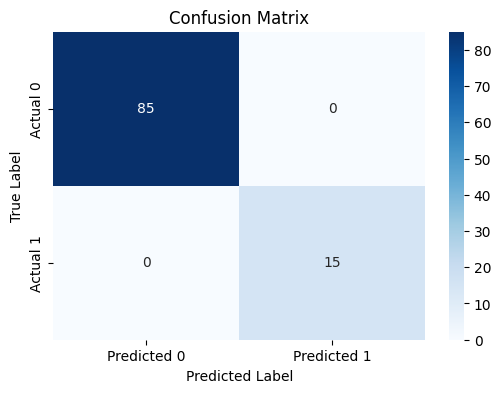

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:\n", cm)

# Generate and print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model optimization

### Subtask:
Optimize the hyperparameters of the RandomForestClassifier model.


**Reasoning**:
Optimize the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV.



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Define features (X) and target (y), removing the 'Date' column
X = df_encoded.drop(['Bleaching Severity_High', 'Date'], axis=1)
y = df_encoded['Bleaching Severity_High']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Train a new model with the best hyperparameters
optimized_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
optimized_rf_model.fit(X_train, y_train)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best score: 1.0


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, random_state=42)

                                     Thank You !